## Machine Learning Internship in collaboration with Start Tech Academy

#### TASK 1: Build a Linear Regression Model to calculate the expected CTC of an employee using Python

###### Step 1: Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###### Step 2: Importing the dataset

In [3]:
dataset=pd.read_csv("Data_file.xlsx - Data - Copy feature naming.csv")

###### Step 3: Analysing and understanding the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No.                 1338 non-null   int64 
 1   College               1338 non-null   object
 2   Role                  1338 non-null   object
 3   City type             1338 non-null   object
 4   Previous CTC          1338 non-null   object
 5   Previous job changes  1338 non-null   int64 
 6   Graduation marks      1338 non-null   int64 
 7   Exp (Months)          1338 non-null   int64 
 8   CTC                   1338 non-null   object
dtypes: int64(4), object(5)
memory usage: 94.2+ KB


NOTE: dtypes: int64(4), object(5)

In [5]:
dataset.describe()

,S.No.,Previous job changes,Graduation marks,Exp (Months)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,2.525411,59.890882,39.207025
std,386.391641,1.123502,14.894696,14.049960
min,1.000000,1.000000,35.000000,18.000000
25%,335.250000,2.000000,47.000000,27.000000
50%,669.500000,3.000000,60.000000,39.000000
75%,1003.750000,4.000000,73.000000,51.000000
max,1338.000000,4.000000,85.000000,64.000000


In [6]:
dataset.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [7]:
dataset.shape

(1338, 9)

In [8]:
dataset.tail()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
1333,1334,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,1335,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,1336,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,1337,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"
1337,1338,Tier 3,Manager,Non-Metro,"51,820.00",1,47,61,"83,346.06"


###### Inference:

- The given dataset has 1338 rows and 9 columns
- For regression analysis, we will consider numeric values
- There are 4 features which are of integer data type namely S.No.,Previous job changes,Graduation marks,Exp (Months)
- The CTC feature is of object datatype

In [ ]:
#dataset['CTC'].astype(str).astype(int)
#raises error because of conversion from comma seperated values to pure integer
#eg: 70,000  ->  70000

In [9]:
# dataset['new']=dataset['CTC'].replace(',','')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No.                 1338 non-null   int64 
 1   College               1338 non-null   object
 2   Role                  1338 non-null   object
 3   City type             1338 non-null   object
 4   Previous CTC          1338 non-null   object
 5   Previous job changes  1338 non-null   int64 
 6   Graduation marks      1338 non-null   int64 
 7   Exp (Months)          1338 non-null   int64 
 8   CTC                   1338 non-null   object
dtypes: int64(4), object(5)
memory usage: 94.2+ KB


In [10]:
dataset['CTC']=dataset.CTC.str.replace(',','').astype(float)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   object 
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 94.2+ KB


In [12]:
dataset.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,71406.58
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,68005.87
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,76764.02
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,82092.39
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,73878.10


Deleting the useless columns which are created as an experiment

In [ ]:
del dataset['newCTC']
del dataset['new']
#this cell may raise error

In [13]:
dataset.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,71406.58
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,68005.87
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,76764.02
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,82092.39
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,73878.10


NOTE: dtypes: float64(1), int64(4), object(4)

###### Step 4: removing extra spaces from column names 

In [14]:
dataset.rename(columns = {'City type':'City_type',
                          'Previous CTC':'Previous_CTC',
                          'Previous job changes':'Previous_job_changes',
                          'Graduation marks':'Graduation_marks',
                          'Exp (Months)':'Exp_(Months)'}, inplace = True)

###### Step 5: finding unique values in those columns which hold discrete information

In [15]:
dataset.College.unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [16]:
dataset.Role.unique()

array(['Manager', 'Executive'], dtype=object)

In [17]:
dataset.City_type.unique()

array(['Non-Metro', 'Metro'], dtype=object)

###### Step 6: Checking for Nan values in the dataset

In [18]:
dataset.isnull().values.any()

False

In [19]:
dataset.isnull().sum()

S.No.                   0
College                 0
Role                    0
City_type               0
Previous_CTC            0
Previous_job_changes    0
Graduation_marks        0
Exp_(Months)            0
CTC                     0
dtype: int64

Checking the distribution of categorial features

In [20]:
dataset.College.value_counts()

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64

In [21]:
dataset.Role.value_counts()

Executive    1064
Manager       274
Name: Role, dtype: int64

In [22]:
dataset.City_type.value_counts()

Metro        676
Non-Metro    662
Name: City_type, dtype: int64

In [23]:
dataset.Previous_job_changes.value_counts()

3    348
4    344
1    333
2    313
Name: Previous_job_changes, dtype: int64

In [15]:
dataset['Previous_CTC']=dataset.Previous_CTC.str.replace(',','').astype(float)
#since the column name was Previous CTC, the space between the 2 words cause syntax error:
#...dataset.Previous CTC.str.replace...
#So, after changing the column name, we are implementing this
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City_type             1338 non-null   object 
 4   Previous_CTC          1338 non-null   float64
 5   Previous_job_changes  1338 non-null   int64  
 6   Graduation_marks      1338 non-null   int64  
 7   Exp_(Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


###### Step 7: Encoding the Data

The categorial values (as text) should be converted into numerical values

In [16]:
dataset.head()

,S.No.,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_(Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,2,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,3,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,4,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,5,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [17]:
dataset.replace({'College':{'Tier 1':1,'Tier 2':2,'Tier 3':3}},inplace=True)
dataset.replace({'Role':{'Manager':0,'Executive':1}},inplace=True)
dataset.replace({'City_type':{'Metro':0,'Non-Metro':1}},inplace=True)

In [18]:
dataset.head()

,S.No.,College,Role,City_type,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_(Months),CTC
0,1,1,0,1,55523.0,3,66,19,71406.58
1,2,2,1,0,57081.0,1,84,18,68005.87
2,3,2,1,0,60347.0,2,52,28,76764.02
3,4,3,1,0,49010.0,2,81,33,82092.39
4,5,3,1,0,57879.0,4,74,32,73878.10


###### The Dataset is ready for implementing machine learning algorithms

Naive Assumptions:
- Manager role may have higher CTC than executive role
- Tier 1 college candidates may get higher CTC than Tier 3 college candidates
- More experienced candidates may get higher CTC than less experienced candidates
- Metro cities may offer more CTC than Non Metro cities
- Higher Graduation marks may indicate that candidates are worthy for higher CTC
- Expected CTC may be higher than Previous CTC

###### Step 8: Splitting the data and target

We create two variables X and Y<br>
X stores the trainning data, Y stores the Target data

In [19]:
X=dataset.drop(['S.No.','CTC'],axis=1)
#axis=1 means vertical data
#axis=0 means horizontal data
Y=dataset['CTC']

###### Step 9: Spliting for training and testing

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
#10% is used for testing, 90% of the data is used for training.

###### Step 10: Training the Model

We are told to use Linear Regression Algorithm

In [21]:
lg_model=LinearRegression()
lg_model.fit(X_train,Y_train)

LinearRegression()

###### Step 11: Model Evaluation

In [22]:
Y_train_pred=lg_model.predict(X_train)

Mean Squared Error:

In [23]:
mean_squared_error(Y_train,Y_train_pred)
#or
np.square(Y_train-Y_train_pred).mean()

63346014.58166719

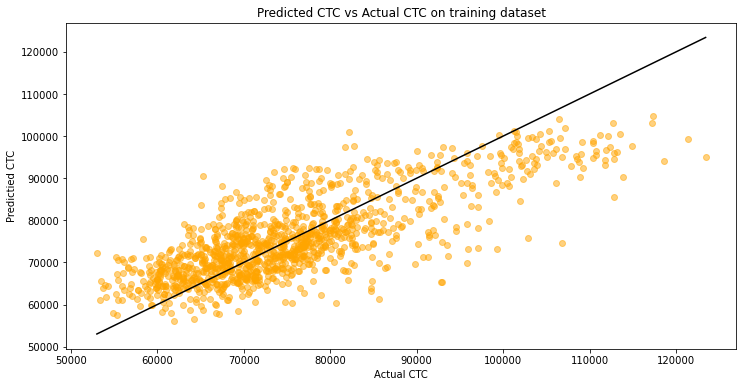

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(Y_train,Y_train_pred,color='orange',alpha=0.5)
plt.xlabel("Actual CTC")
plt.ylabel("Predictied CTC")
plt.title("Predicted CTC vs Actual CTC on training dataset")
p1 = max(max(Y_train), max(Y_train_pred))
p2 = min(min(Y_train), min(Y_train_pred))
plt.plot([p1, p2], [p1, p2], color='black')
plt.show()

In [107]:
#Y_test_pred=lg_model.predict(X_test)

###### Step 12: Linear Regression Line

In [25]:
lg_model.coef_

array([-2.71260875e+03, -1.93318524e+04, -4.10930092e+03,  3.99592083e-01,
       -1.51264493e+01, -9.92001654e+00,  2.61877117e+02])

In [26]:
lg_model.intercept_

65892.83550222967

In [27]:
new = pd.DataFrame({'Actual_CTC': Y_train, 'Predicted_CTC': Y_train_pred})
new
#new has 1204 rows since train data is only 90% of the original, the rest 10% is for testing

,Actual_CTC,Predicted_CTC
378,75104.22,71841.111030
155,76619.74,75483.900797
722,77770.17,83821.894210
1118,94368.83,94797.395309
321,79572.91,68236.546329
...,...,...
950,74893.91,75482.216034
907,70973.39,70778.102706
986,66304.02,69467.185740
20,73487.13,78829.754727


Equation of Line: Predicted CTC vs Actual CTC<br>
    y=mx+c<br>
    y=2.587629x + 65678.3627916

In [36]:
accuracy=100-abs((new['Predicted_CTC']-new['Actual_CTC'])*100/new['Actual_CTC'])
#accuracy=(numerator/new['Actual_CTC'])*100
#accuracy
accuracy

378     95.655226
155     98.517563
722     92.218451
1118    99.545861
321     85.753489
          ...    
950     99.214481
907     99.724844
986     95.229300
20      92.729850
700     94.801435
Length: 1204, dtype: float64

In [37]:
accuracy.describe()

count    1204.000000
mean       91.783861
std         6.202065
min        61.416422
25%        88.748060
50%        93.099073
75%        96.530036
max        99.988826
dtype: float64

###### The Accuracy of the model is 91.783%